In [118]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
# from skimage import data
# from skimage.feature import blob_dog, blob_log, blob_doh
# from math import sqrt
# from skimage.color import rgb2gray
# import glob
# from skimage.io import imread
from tqdm import tqdm
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Keras
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras import layers
from functools import partial

In [2]:
from PIL import Image

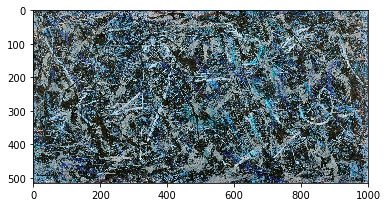

In [9]:
DATADIR = "D:/DU_Bootcamp/artwork_styles/styles"
CATEGORIES = ["abstract_expressionism", "abstractionism", "art_nouveau", "baroque",
             "byzantine_art", "cubism", "early_renaissance", "expressionism", "high_renaissance",
             "impressionism", "mannerism", "muralism", "neoplasticism", "northern_renaissance",
             "pop_art", "post_impressionism", "primitivism", "proto_renaissance",
             "realism", "romanticism", "social_realism", "suprematism", "surrealism",
             "symbolism"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to art categories
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array)

[[[ 90 112 153]
  [ 61  87 124]
  [ 65  99 129]
  ...
  [176 190 208]
  [134 164 181]
  [ 75 113 131]]

 [[ 70  96 136]
  [ 76 106 141]
  [ 49  85 115]
  ...
  [167 182 198]
  [160 188 205]
  [ 74 110 128]]

 [[ 67 105 140]
  [ 45  83 117]
  [ 61 101 130]
  ...
  [153 166 182]
  [167 193 210]
  [102 136 152]]

 ...

 [[ 68 112 141]
  [ 57 100 127]
  [ 48  89 112]
  ...
  [125 144 157]
  [167 186 199]
  [ 83 102 115]]

 [[ 73 119 150]
  [ 58 102 131]
  [ 54  95 120]
  ...
  [128 147 162]
  [137 153 169]
  [169 185 201]]

 [[121 167 198]
  [ 64 108 137]
  [ 40  81 106]
  ...
  [154 173 188]
  [122 138 154]
  [100 116 132]]]


In [71]:
img_size = 120

In [72]:
training_data = []



def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to art categories
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [73]:
print(len(training_data))

10182


In [13]:
training_data[0:5]

[[array([[[ 41,  44,  50],
          [ 63,  78,  87],
          [ 85, 118, 135],
          ...,
          [105, 126, 133],
          [157, 191, 194],
          [125, 163, 181]],
  
         [[ 65,  89,  95],
          [116, 122, 119],
          [ 81,  84,  84],
          ...,
          [129, 142, 148],
          [114, 145, 148],
          [141, 182, 197]],
  
         [[168, 180, 182],
          [164, 192, 208],
          [ 27,  35,  21],
          ...,
          [ 71,  57,  61],
          [110, 110, 123],
          [183, 193, 211]],
  
         ...,
  
         [[104, 170, 193],
          [127, 171, 201],
          [107, 158, 177],
          ...,
          [ 93, 140, 154],
          [ 52,  59,  82],
          [ 70, 140, 164]],
  
         [[144, 149, 165],
          [104, 150, 179],
          [ 83, 156, 170],
          ...,
          [ 91, 117, 135],
          [ 25,  46,  49],
          [121, 149, 164]],
  
         [[117, 151, 173],
          [118, 153, 179],
          [146, 177, 183

In [ ]:
import random

In [74]:


random.shuffle(training_data)

In [27]:
for sample in training_data:
    print(sample[1])

9
16
18
3
7
9
7
18
22
9
9
3
8
6
9
19
5
6
5
17
9
9
18
7
9
7
15
17
14
13
22
23
15
5
15
7
15
8
16
19
15
16
9
9
15
3
16
7
18
8
15
15
8
15
15
8
16
14
15
9
9
10
22
5
8
19
13
13
9
9
15
8
5
9
13
15
19
8
16
14
6
7
10
1
9
22
1
17
19
3
8
5
3
5
12
18
5
3
2
7
3
23
9
2
17
16
23
17
9
15
23
15
9
2
3
3
9
16
9
9
23
22
9
19
10
16
14
2
9
18
9
22
16
19
16
19
9
23
14
19
22
9
15
6
15
8
14
3
16
16
14
8
23
7
17
16
9
22
22
8
15
9
15
8
15
7
15
16
9
23
10
3
9
23
9
9
22
22
3
15
9
3
1
3
22
9
15
5
19
16
15
9
15
20
7
7
10
9
23
22
13
15
23
23
8
9
22
3
5
10
10
22
20
5
7
19
6
15
13
15
18
15
15
19
3
15
15
9
5
15
9
15
15
9
22
15
9
9
15
9
8
23
14
9
9
13
16
21
9
15
8
18
23
15
16
9
9
15
15
2
3
15
13
22
1
13
8
6
9
22
9
9
23
15
1
9
10
9
16
23
8
17
15
3
2
15
23
15
15
15
6
9
9
13
5
9
16
15
15
7
21
16
7
13
1
17
22
16
15
9
7
14
15
9
9
3
15
9
9
15
23
3
9
9
7
23
9
15
22
13
13
15
22
22
1
13
15
3
9
3
18
1
16
23
13
13
15
10
0
22
1
7
9
13
10
9
21
1
19
15
15
10
9
21
4
23
9
15
9
9
3
19
22
17
23
23
23
10
3
19
19
9
6
8
2
22
8
7
3
9
5
9
3
23

15
8
3
7
13
15
14
22
22
13
16
15
11
1
8
8
15
8
5
19
22
7
19
3
7
5
7
9
15
9
15
8
9
15
3
9
8
10
15
8
9
8
5
9
23
13
9
22
22
15
5
15
17
3
9
9
16
8
22
23
3
10
15
9
13
9
5
15
3
9
3
18
10
8
15
7
15
14
19
9
19
15
5
15
15
1
8
9
2
23
9
15
10
9
7
22
15
8
9
8
9
9
23
22
15
15
9
15
9
9
14
8
9
5
3
9
15
14
16
9
9
1
9
15
5
14
9
15
13
13
9
11
23
22
13
15
1
23
13
9
10
10
14
9
9
13
13
18
9
22
15
9
9
9
13
15
8
9
22
22
16
18
9
3
22
22
6
13
16
9
9
17
9
5
7
3
9
22
8
16
15
19
9
19
9
23
9
16
23
22
15
13
13
13
7
8
9
9
18
19
9
22
8
13
22
9
10
13
13
3
14
5
1
19
13
3
15
9
15
9
13
3
11
16
9
9
9
11
23
2
13
15
3
1
16
15
15
9
13
15
10
9
4
15
18
1
3
13
16
5
9
9
23
13
9
14
10
9
22
1
3
15
9
16
3
8
15
17
19
22
23
15
22
10
15
15
15
15
8
18
3
9
19
9
8
19
16
15
5
2
1
3
5
16
9
18
13
14
18
9
13
20
18
10
15
8
15
12
15
9
15
9
9
5
14
10
1
3
23
9
22
9
9
9
23
23
9
8
15
1
15
13
18
23
9
11
9
9
1
13
1
13
9
5
10
15
16
9
9
6
7
9
8
17
15
15
15
23
19
14
5
15
7
1
23
23
13
19
2
4
9
5
15
15
6
3
15
23
15
15
9
10
22
15
7
10
7
3
6
8
15
19
3
7
15

In [75]:
X = []
y = []

In [76]:
for features, label in training_data:
    X.append(features)
    y.append(label)


In [77]:
len(X)

10182

In [78]:
len(y)

10182

In [79]:
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [80]:
X.shape

(10182, 120, 120, 3)

In [81]:
(trainX, testX, trainY, testY) = train_test_split(X, y)

In [5]:
# import pickle

In [82]:
pickle_out1 = open("trainX.pickle", "wb")
pickle.dump(trainX, pickle_out1)
pickle_out1.close

pickle_out2 = open("testX.pickle", "wb")
pickle.dump(testX, pickle_out2)
pickle_out2.close

pickle_out3 = open("trainY.pickle", "wb")
pickle.dump(trainY, pickle_out3)
pickle_out3.close

pickle_out4 = open("testY.pickle", "wb")
pickle.dump(testY, pickle_out4)
pickle_out4.close

<function BufferedWriter.close>

In [8]:
# pickle_inX = open("X.pickle", "rb")
# pickle_inY = open("y.pickle", "rb")
# X = pickle.load(pickle_inX)
# y = pickle.load(pickle_inY)

EOFError: Ran out of input

In [44]:
trainX[0,:,:]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

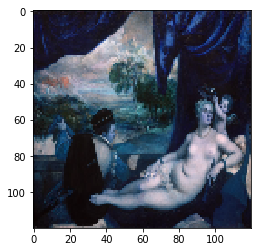

In [83]:
plt.imshow(trainX[0,:,:], cmap=plt.cm.jet)

In [84]:
trainX.shape

(7636, 120, 120, 3)

In [74]:
# testX.shape

(2546, 64, 64, 3)

In [49]:
trainX[0].shape

(64, 64, 3)

In [27]:
# trainX = trainX.reshape(7636, -1)#.shape


In [48]:
trainX.shape

(7636, 64, 64, 3)

In [85]:
testX.shape

(2546, 120, 120, 3)

In [86]:
# # flatten 64x64 pixels to a 1D array
# ndims = trainX.shape[1] * trainX.shape[2]
# trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], trainX.shape[2], 1)
# testX = testX.reshape(testX.shape[0], ndims)
# print(trainX)
#print(testX)

In [25]:
# testX = testX.reshape(2546, -1)#.shape

In [67]:
# trainX[0].ptp

<function ndarray.ptp>

In [88]:
testX.shape

(2546, 120, 120, 3)

In [89]:
# normalize to be between 0 and 1
# scaler = MinMaxScaler().fit(trainX)

# X_train = scaler.transform(trainX)
# X_test = scaler.transform(testX)

In [83]:
# MinMaxScaler()

MinMaxScaler(copy=True, feature_range=(0, 1))

In [90]:
# Make labels categorical
num_classes = 24
trainY = to_categorical(trainY, num_classes)
testY = to_categorical(testY, num_classes)

In [91]:
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [115]:
# Create model
model = Sequential()

# Add model layers
model.add(Conv2D(32, kernel_size=3, strides=1, activation="relu", padding = "same", input_shape= (img_size,img_size,3)))
model.add(Conv2D(32, kernel_size=3, strides=1, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=2, strides=1, activation="relu", padding = "same"))
model.add(Conv2D(64, kernel_size=2, strides=1, activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(24, activation="softmax"))

In [125]:
conv3 = partial(layers.Conv2D,
               kernel_size=3,
               strides=1,
               padding="same",
               activation="relu")
def block(in_tensor, filters, n_convs):
    conv_block = in_tensor
    for _ in range(n_convs):
        conv_block = conv3(filters=filters)(conv_block)
    return conv_block
def _vgg(in_shape=(img_size,img_size, 3),
        n_classes=1000,
        opt="sgd",
        n_stages_per_blocks = [2, 2, 3, 3, 3]):
    in_layer = layers.Input(in_shape)

    block1 = block(in_layer, 64, n_stages_per_blocks[0])
    pool1 = layers.MaxPool2D()(block1)
    block2 = block(pool1, 128, n_stages_per_blocks[1])
    pool2 = layers.MaxPool2D()(block2)
    block3 = block(pool2, 256, n_stages_per_blocks[2])
    pool3 = layers.MaxPool2D()(block3)
    block4 = block(pool3, 512, n_stages_per_blocks[3])
    pool4 = layers.MaxPool2D()(block4)
    block5 = block(pool4, 512, n_stages_per_blocks[4])
    pool5 = layers.MaxPool2D()(block5)
    flattened = layers.GlobalAvgPool2D()(pool5)

    dense1 = layers.Dense(4096, activation='relu')(flattened)
    dense2 = layers.Dense(4096, activation='relu')(dense1)
    preds = layers.Dense(24, activation='softmax')(dense2)

    model2 = Model(in_layer, preds)
    model2.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model2

def vgg16(in_shape=(img_size,img_size,3), n_classes=1000, opt='sgd'):
    return _vgg(in_shape, n_classes, opt)

def vgg19(in_shape=(img_size,img_size,3), n_classes=1000, opt='sgd'):
    return _vgg(in_shape, n_classes, opt, [2, 2, 4, 4, 4])

if __name__ == '__main__':
    model2 = vgg19()
    print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 120, 120, 3)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 120, 120, 64)      1792      
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 120, 120, 64)      36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 60, 60, 128)       147584    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 128)       0         
__________

In [108]:
# Compile model using accuracy to measure model performance
model.compile(optimizer="adam", loss="categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
%%time
model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

Train on 7636 samples, validate on 2546 samples
Epoch 1/3


6496/7636 [========================>.....] - ETA: 49:40 - loss: 3.1736 - acc: 0.0000e+ - ETA: 40:49 - loss: 3.1659 - acc: 0.0625   - ETA: 37:59 - loss: 3.1626 - acc: 0.09 - ETA: 36:21 - loss: 3.1549 - acc: 0.10 - ETA: 35:30 - loss: 3.1464 - acc: 0.11 - ETA: 34:47 - loss: 3.1332 - acc: 0.11 - ETA: 34:12 - loss: 3.1063 - acc: 0.13 - ETA: 33:40 - loss: 3.0507 - acc: 0.14 - ETA: 33:19 - loss: 3.0223 - acc: 0.15 - ETA: 33:02 - loss: 3.0267 - acc: 0.15 - ETA: 32:47 - loss: 3.0316 - acc: 0.13 - ETA: 32:30 - loss: 3.0126 - acc: 0.15 - ETA: 32:22 - loss: 2.9916 - acc: 0.15 - ETA: 32:07 - loss: 2.9756 - acc: 0.16 - ETA: 31:53 - loss: 2.9842 - acc: 0.16 - ETA: 31:39 - loss: 2.9916 - acc: 0.15 - ETA: 31:28 - loss: 2.9951 - acc: 0.14 - ETA: 31:16 - loss: 2.9948 - acc: 0.14 - ETA: 31:05 - loss: 2.9937 - acc: 0.14 - ETA: 30:54 - loss: 2.9935 - acc: 0.13 - ETA: 30:44 - loss: 2.9834 - acc: 0.13 - ETA: 30:34 - loss: 2.9843 - acc: 0.13 - ETA: 30:28 - loss: 2.9828 - acc: 0.13 - ETA: 30:17 - loss: 2.9728 -

7636/7636 [==============================] - ETA: 5:02 - loss: 2.8821 - acc: 0.167 - ETA: 4:53 - loss: 2.8818 - acc: 0.168 - ETA: 4:44 - loss: 2.8816 - acc: 0.168 - ETA: 4:35 - loss: 2.8811 - acc: 0.168 - ETA: 4:27 - loss: 2.8807 - acc: 0.169 - ETA: 4:18 - loss: 2.8806 - acc: 0.168 - ETA: 4:09 - loss: 2.8800 - acc: 0.168 - ETA: 4:00 - loss: 2.8804 - acc: 0.168 - ETA: 3:52 - loss: 2.8805 - acc: 0.167 - ETA: 3:43 - loss: 2.8797 - acc: 0.167 - ETA: 3:34 - loss: 2.8794 - acc: 0.167 - ETA: 3:25 - loss: 2.8794 - acc: 0.167 - ETA: 3:17 - loss: 2.8784 - acc: 0.167 - ETA: 3:08 - loss: 2.8785 - acc: 0.167 - ETA: 2:59 - loss: 2.8775 - acc: 0.168 - ETA: 2:51 - loss: 2.8772 - acc: 0.168 - ETA: 2:42 - loss: 2.8762 - acc: 0.168 - ETA: 2:33 - loss: 2.8780 - acc: 0.168 - ETA: 2:24 - loss: 2.8783 - acc: 0.168 - ETA: 2:16 - loss: 2.8781 - acc: 0.169 - ETA: 2:07 - loss: 2.8775 - acc: 0.169 - ETA: 1:58 - loss: 2.8767 - acc: 0.169 - ETA: 1:49 - loss: 2.8769 - acc: 0.168 - ETA: 1:41 - loss: 2.8766 - acc: 0.1

In [110]:
model_loss, model_accuracy = model.evaluate(testX, testY, verbose=2)
print(model_loss, model_accuracy)

15.453366141757531 0.04124116261093896
